In [1]:
__date__   = 4/4/2018
__author__ = "Alok Singh"

In [2]:
# Paper: https://arxiv.org/pdf/0710.3742v1.pdf

In [3]:
import pickle
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import graphlab as gl

In [4]:
os.chdir("/datavol2/bnl_dataframes/csvs")

bimodal_names = []

for file in glob.glob("*.png"):
    bimodal_names.append(str(file[15:-30]))

In [5]:
#bimodal_names

In [6]:
os.getcwd()
os.chdir("/datavol2/bnl_dataframes/csvs")
os.getcwd()

init  = True
sf    = None
itera = 0

for file in glob.glob("ee*.json.df.csv"):
    itera += 1
    #
    if init:
        #first call
        sf = gl.SFrame.read_csv(file, verbose=False)
        init = False
    else:
        sf = sf.append(gl.SFrame.read_csv(file, verbose=False))
    #
    print(itera, " File : ", file, "| Size > ", sf.num_cols(), sf.num_rows())
    #

This non-commercial license of GraphLab Create for academic use is assigned to a1singh@eng.ucsd.edu and will expire on February 23, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1523481195.log


(1, ' File : ', 'ee-test-for-ml-lammps-128+128.3755465.0.json.df.csv', '| Size > ', 6, 173033)
(2, ' File : ', 'ee-test-for-ml-lammps-128+128.3755465.1.json.df.csv', '| Size > ', 6, 344592)
(3, ' File : ', 'ee-test-for-ml-lammps-128+128.3755465.10.json.df.csv', '| Size > ', 6, 515392)
(4, ' File : ', 'ee-test-for-ml-lammps-128+128.3755465.100.json.df.csv', '| Size > ', 6, 689818)
(5, ' File : ', 'ee-test-for-ml-lammps-128+128.3755465.101.json.df.csv', '| Size > ', 6, 863388)
(6, ' File : ', 'ee-test-for-ml-lammps-128+128.3755465.102.json.df.csv', '| Size > ', 6, 1036022)
(7, ' File : ', 'ee-test-for-ml-lammps-128+128.3755465.103.json.df.csv', '| Size > ', 6, 1203746)
(8, ' File : ', 'ee-test-for-ml-lammps-128+128.3755465.104.json.df.csv', '| Size > ', 6, 1375310)
(9, ' File : ', 'ee-test-for-ml-lammps-128+128.3755465.105.json.df.csv', '| Size > ', 6, 1547419)
(10, ' File : ', 'ee-test-for-ml-lammps-128+128.3755465.106.json.df.csv', '| Size > ', 6, 1718044)
(11, ' File : ', 'ee-test-for

In [7]:
import graphlab.aggregate as agg
ngram_count = sf.groupby(key_columns='kl', operations={'numberofcalls': agg.COUNT()})

In [8]:
ngram_count = ngram_count.sort('numberofcalls', ascending = False)
ngram_count.print_rows(max_column_width=60)

+-------------------------------------------------------------+---------------+
|                              kl                             | numberofcalls |
+-------------------------------------------------------------+---------------+
| voidLAMMPS_NS::Run::command(int,char**):voidLAMMPS_NS::V... |    28593962   |
| voidLAMMPS_NS::Run::command(int,char**):voidLAMMPS_NS::V... |    28593962   |
| voidLAMMPS_NS::Run::command(int,char**):voidLAMMPS_NS::V... |    28593962   |
| voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS::PairEAM::... |    28523690   |
| voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS::PairEAM::... |    28523690   |
| voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS::PairEAM::... |    28523690   |
| voidLAMMPS_NS::Run::command(int,char**):voidLAMMPS_NS::V... |    14814720   |
| voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS::PairEAM::... |    14814720   |
| voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS::PairEAM::... |    14814720   |
| voidLAMMPS_NS::Verlet::run(int):voidLA

In [9]:
# Define max and min threshold
minn = 0
maxx = float("inf")

subset = ngram_count[(ngram_count['numberofcalls'] > minn) & (ngram_count['numberofcalls'] < maxx)]
freq   = subset

In [17]:
freq

kl,numberofcalls
"voidLAMMPS_NS::Run::command(int,char**):voidLA ...",28593962
"voidLAMMPS_NS::Run::command(int,char**):voidLA ...",28593962
"voidLAMMPS_NS::Run::command(int,char**):voidLA ...",28593962
voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS: ...,28523690
voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS: ...,28523690
voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS: ...,28523690
"voidLAMMPS_NS::Run::command(int,char**):voidLA ...",14814720
voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS: ...,14814720
voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS: ...,14814720
voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS: ...,14814720


In [11]:
%%time

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

namematch = {}

for i in range(len(freq)):
    pick_func = freq[i]['kl']
    
    for bim in bimodal_names:
        if bim in pick_func:
            if bim in namematch:
                namematch[bim].append(pick_func)
            else:
                namematch[bim] = [pick_func]

CPU times: user 482 ms, sys: 2.69 s, total: 3.17 s
Wall time: 362 ms


In [12]:
# Testcase

for k, v in namematch.iteritems():
    if len(v)>1: 
        # is there a match to more than 1 functions
        print(k, len(v))

In [15]:
def perform_bayesiancp(sf, thetitle, frac, erunlen=3, inputlag=3):
    import numpy as np
    import matplotlib.pyplot as plt
    
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(15.5, 10.5)
    
    #Prune extreme outliers
    prune   = 100000
    howmany = 1
    
    while (len(sf[sf['time_diff']>prune]) > 10):
        prune   += 50000
        howmany += 1
        if(howmany > 100):
            print('Break')
            break
    
    sf = sf[sf['time_diff']<prune]
    
    # sort by time
    sf = sf.sort('time_by_lasttime', ascending = True)
    #print('Checkpoint 1 Sorted')
    
    model = gl.anomaly_detection.bayesian_changepoints.create(sf, feature = 'time_diff', 
                                                              expected_runlength = erunlen, 
                                                              lag = inputlag)
    
    #model['scores'].print_rows(max_column_width=100)
    
    scores = model['scores']['changepoint_score']
    
    #print('Verification Checkpoint -- 2A --')
    #print(len(scores), len(sf))
    #print('\nVerification Checkpoint -- 2B --')
    #model['scores'].print_rows(max_column_width=100)
    #sf.print_rows(max_column_width=20)
    #print('\nVerification Checkpoint -- 2C --')
    if not (all(model['scores']['time_diff'] == sf['time_diff'])):
        print('Error : Test 2C Failed')
    
    
    print('************************************************************')
    # Select the threshold value

    thresh    = 0.98
    increment = .005
    last      = -10
    
    while (len(scores[scores>thresh]) > frac*len(scores) and thresh<=.9999 and last != thresh):
        last = thresh
        
        if (thresh + increment < 1):
            thresh  += increment    #go fast
        if thresh > 0.99:
            increment = .0001       #go slow
        
    print("Threshold = %.4f, #Anomalies=%d, Total #Datapoints=%d" % (thresh, len(scores[scores>thresh]), len(scores)))
    
    plt.title("[BC]" + str(thetitle))
    
    # Method 1
    #print('Checkpoint 3')
    df_outliers   = model['scores'][model['scores']['changepoint_score'] > thresh]
    time_outliers = sf[model['scores']['changepoint_score'] > thresh]['time_by_lasttime']
    
    #print('Checkpoint 4')
    df_normals   = model['scores'][model['scores']['changepoint_score'] <= thresh]
    time_normals = sf[model['scores']['changepoint_score'] <= thresh]['time_by_lasttime']
    
    # Plot
    #print('Checkpoint 5')
    g = plt.scatter(time_normals ,  df_normals['time_diff'], c='green', s=65, edgecolor='k')
    h = plt.scatter(time_outliers, df_outliers['time_diff'], c='red', s=65, edgecolor='k')
    
    # Adjust Plot
    minx=sf['time_by_lasttime'].min()
    maxx=sf['time_by_lasttime'].max()
    miny=sf['time_diff'].min()
    maxy=sf['time_diff'].max()
    
    plt.axis('tight')
    plt.xlim((minx, maxx))
    plt.ylim((miny, maxy))
    plt.legend([g, h],["Normal","Outliers"],loc="upper right")
    plt.show()

In [16]:
selected = []

for i in range(len(freq)):
    pick_func = freq[i]['kl']
    # only pick functions that match
    for nam in namematch:
        if nam in pick_func:
            selected.append(pick_func)

CPU times: user 417 ms, sys: 3.33 s, total: 3.74 s
Wall time: 358 ms


In [23]:
freq_subset = freq.filter_by(selected, 'kl')

if (len(selected) != len(freq_subset)):
    print('Error')

for i in range(len(selected)):
    if selected[i] != freq_subset[i]['kl']:
        print('Error')

Progress: 0.0%
************************************************************
Threshold = 0.9800, #Anomalies=75, Total #Datapoints=60480


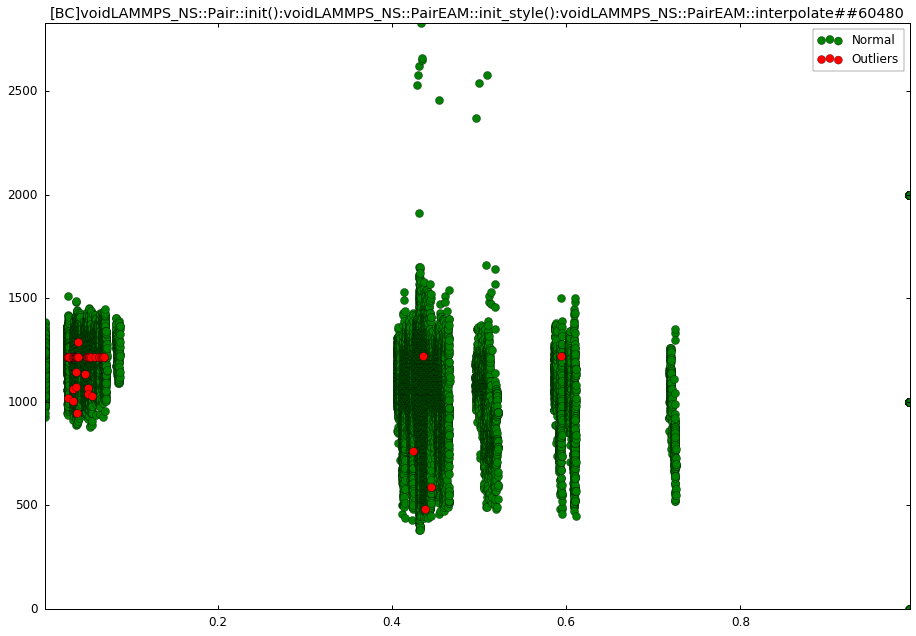

************************************************************
Threshold = 0.9850, #Anomalies=193, Total #Datapoints=20160


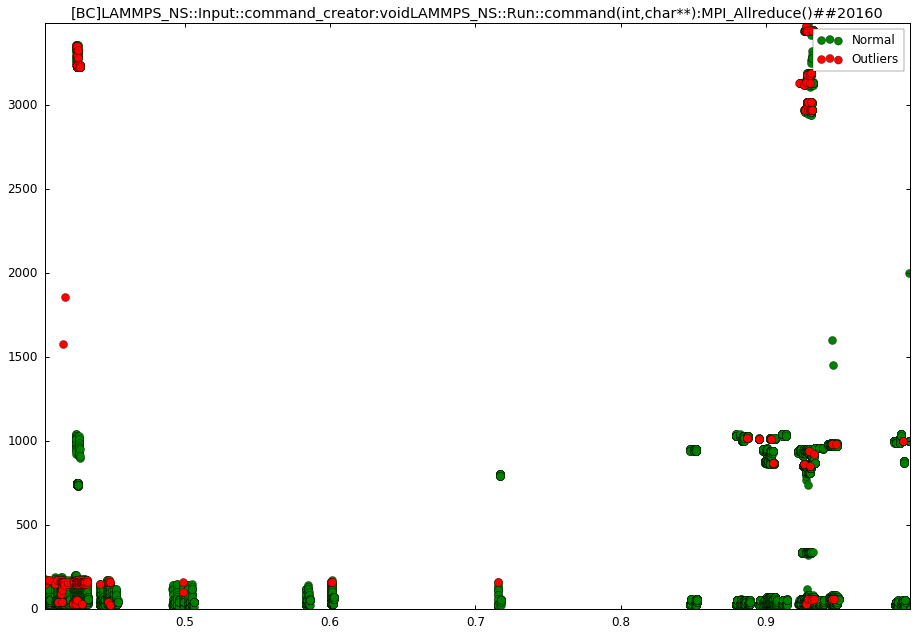

Progress: 5.26315789474%
************************************************************
Threshold = 0.9800, #Anomalies=2, Total #Datapoints=16128


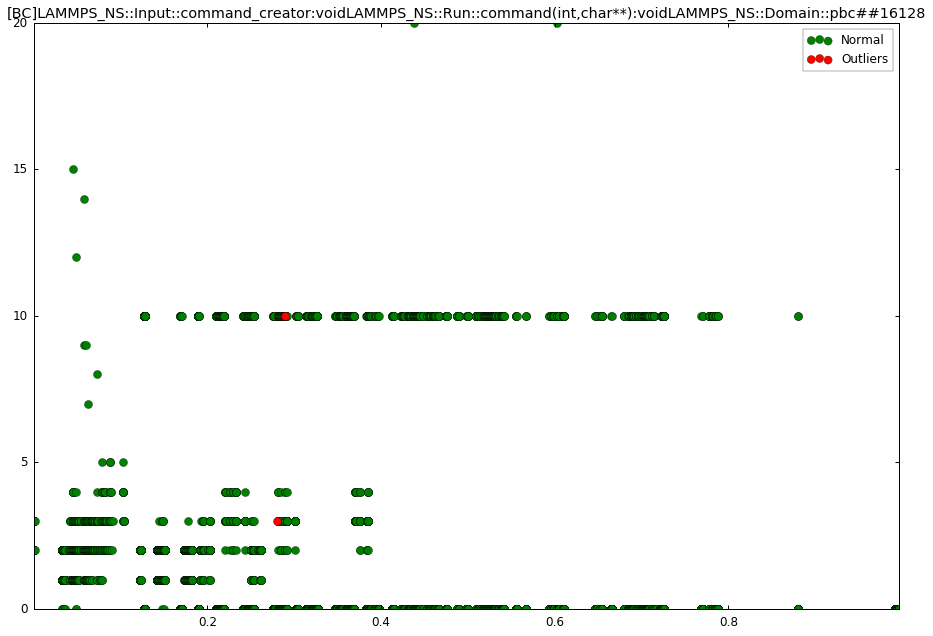

************************************************************
Threshold = 0.9800, #Anomalies=37, Total #Datapoints=16128


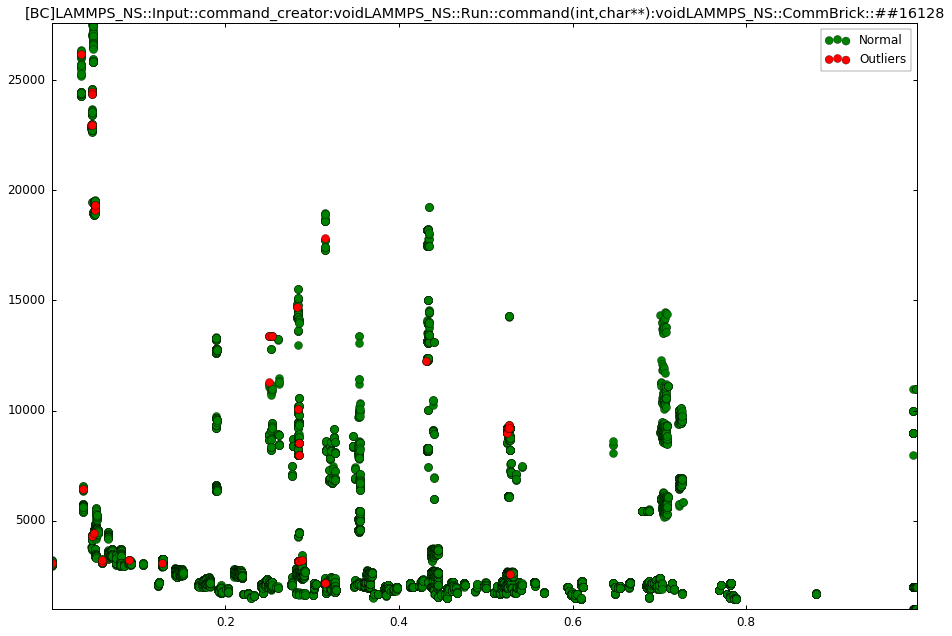

Progress: 10.5263157895%
************************************************************
Threshold = 0.9800, #Anomalies=8, Total #Datapoints=14750


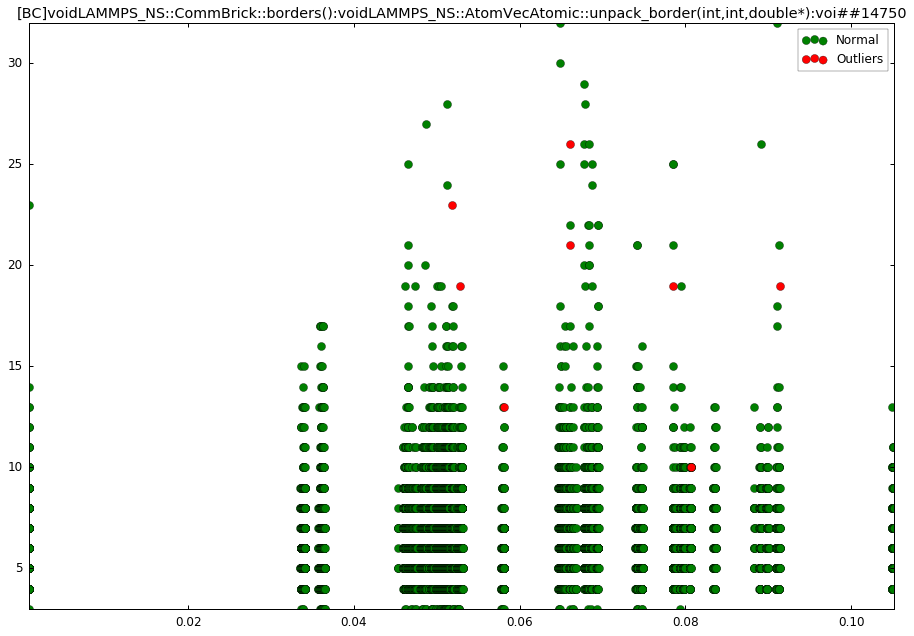

************************************************************
Threshold = 0.9800, #Anomalies=22, Total #Datapoints=10473


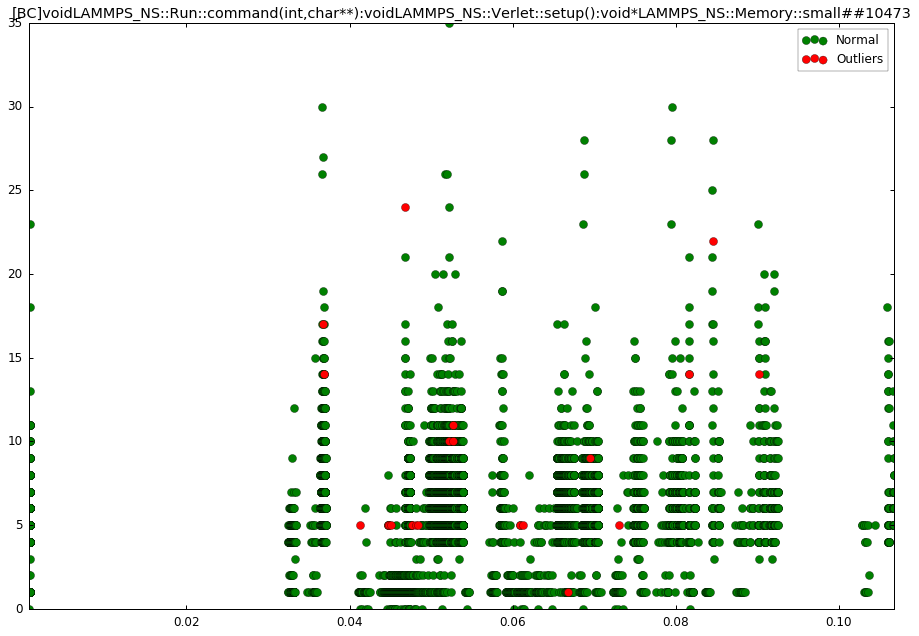

Progress: 15.7894736842%
************************************************************
Threshold = 0.9800, #Anomalies=58, Total #Datapoints=10080


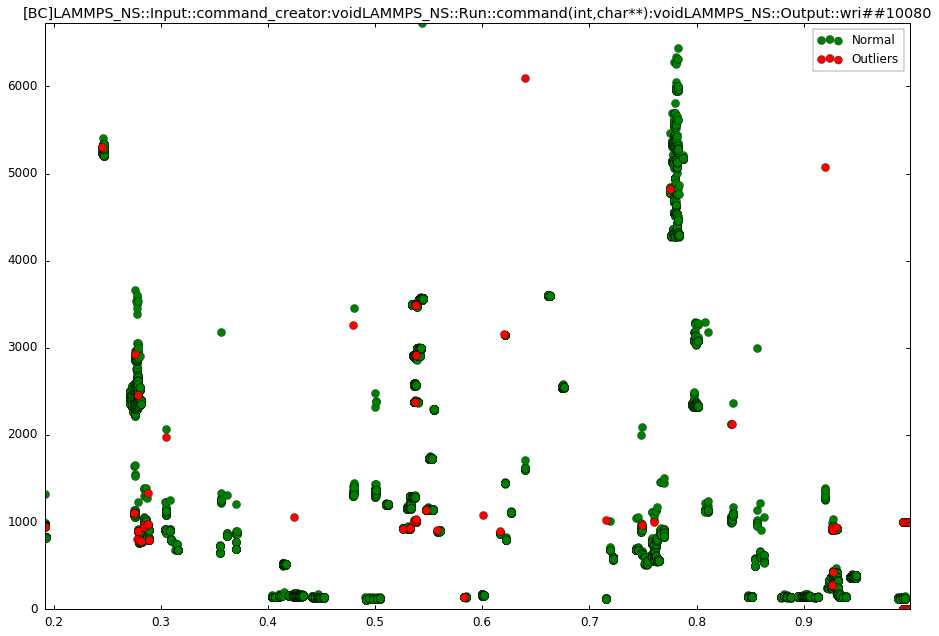

************************************************************
Threshold = 0.9800, #Anomalies=22, Total #Datapoints=10080


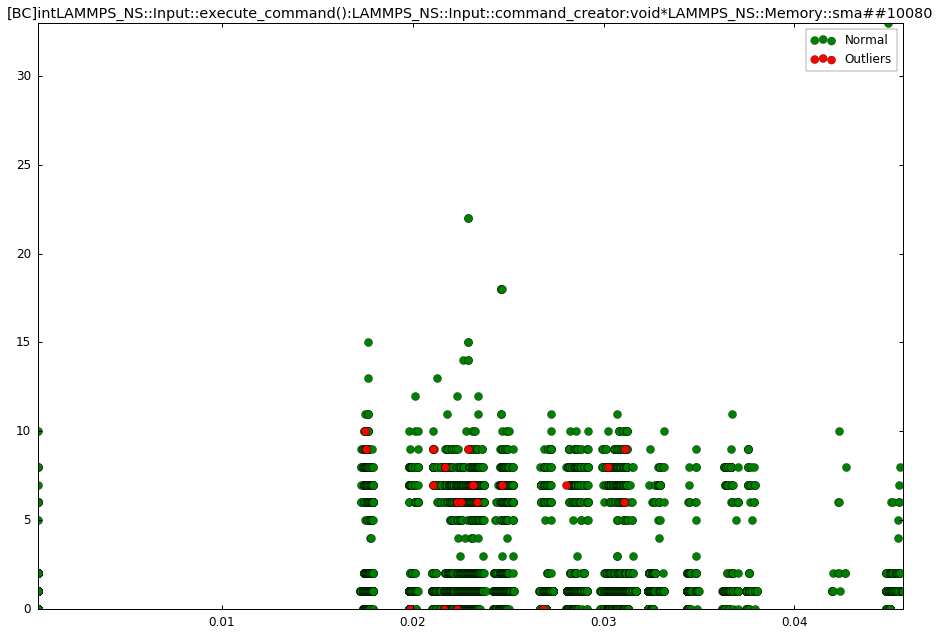

************************************************************
Threshold = 0.9800, #Anomalies=196, Total #Datapoints=10080


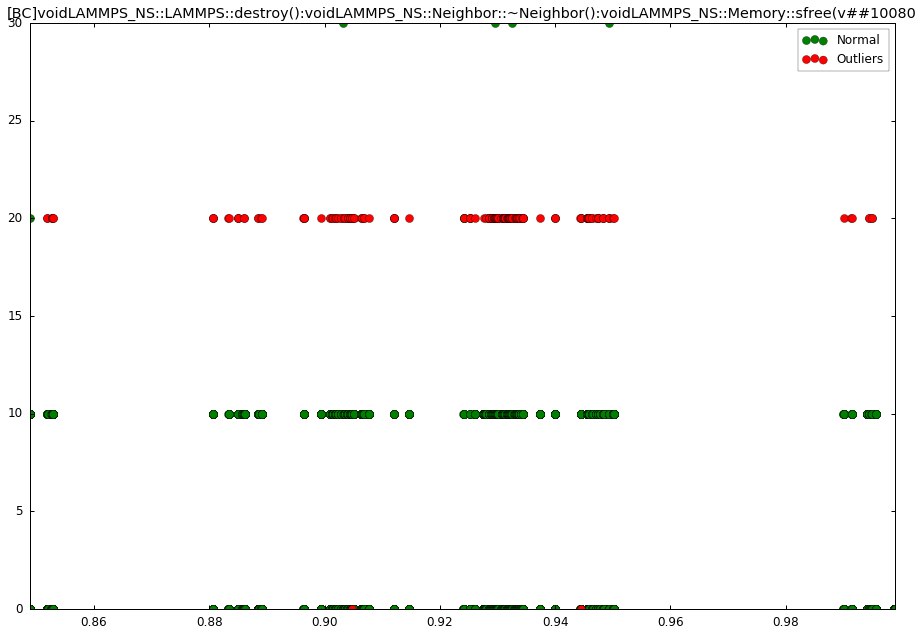

************************************************************
Threshold = 0.9800, #Anomalies=27, Total #Datapoints=8064


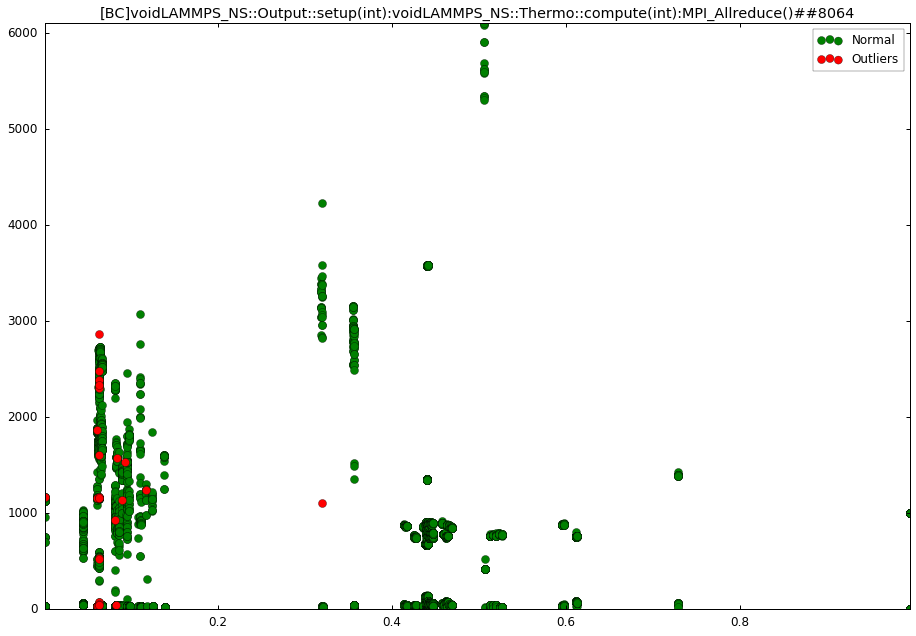

************************************************************
Threshold = 0.9800, #Anomalies=37, Total #Datapoints=8064


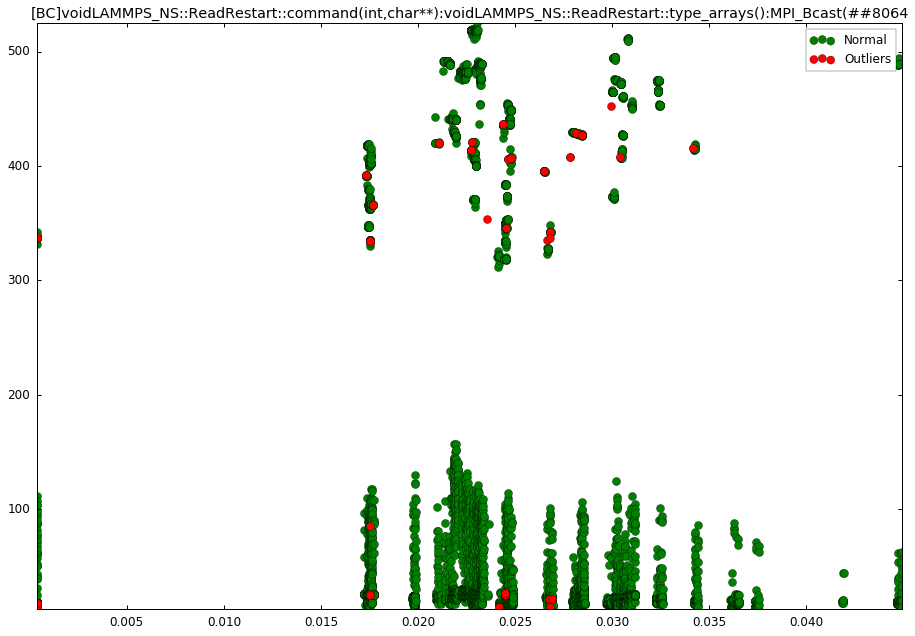

************************************************************
Threshold = 0.9900, #Anomalies=185, Total #Datapoints=8064


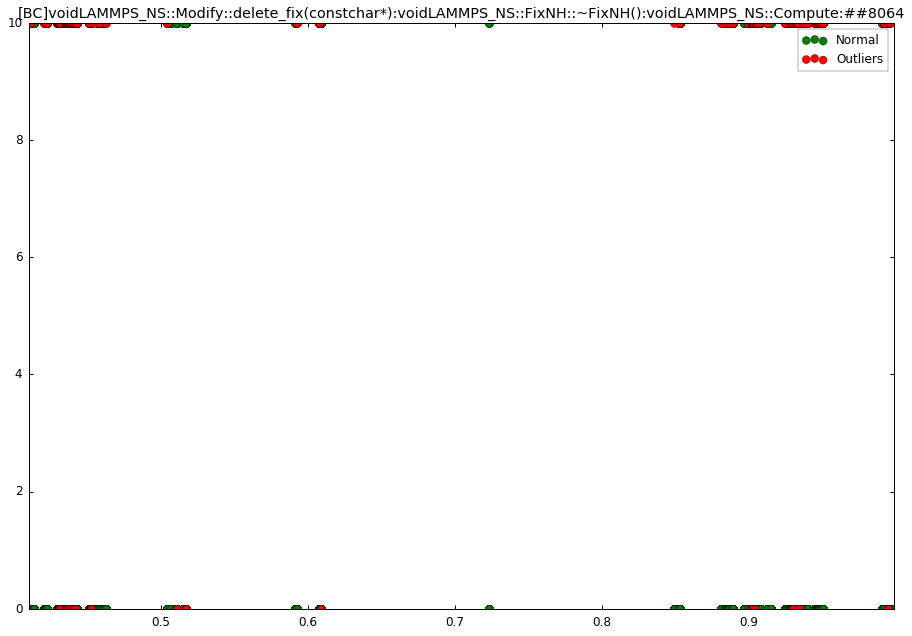

************************************************************
Threshold = 0.9800, #Anomalies=62, Total #Datapoints=8064


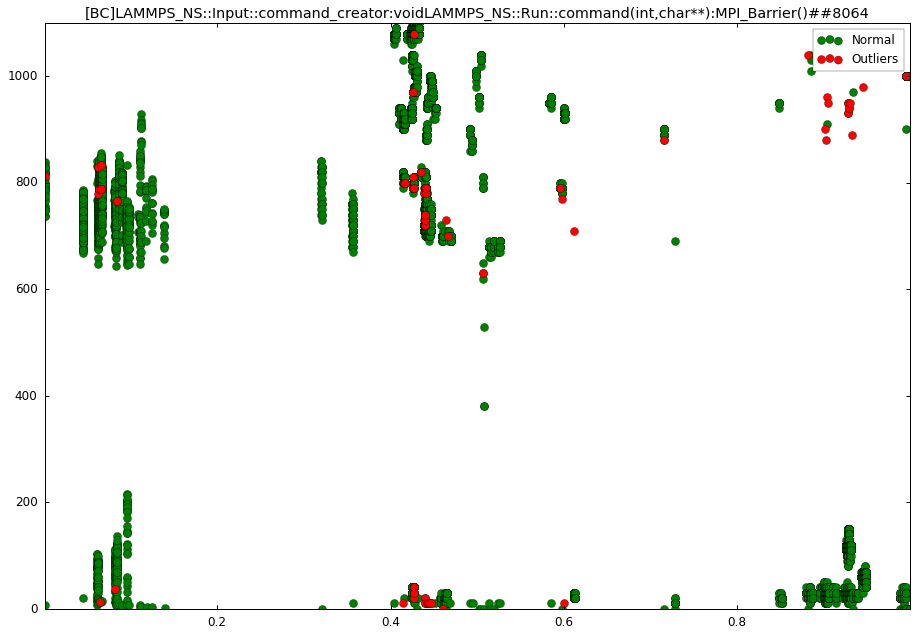

************************************************************
Threshold = 0.9800, #Anomalies=0, Total #Datapoints=8064


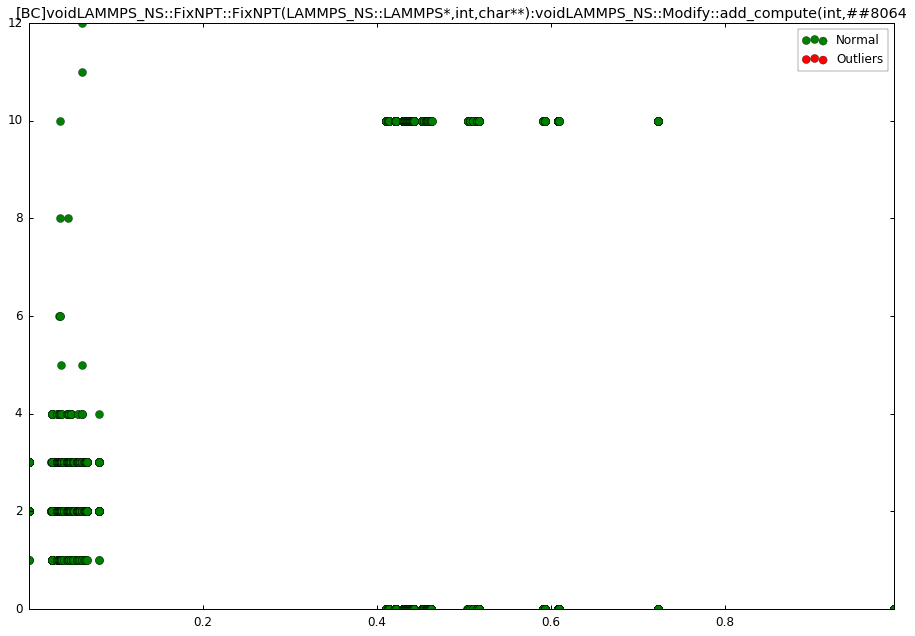

************************************************************
Threshold = 0.9800, #Anomalies=22, Total #Datapoints=8064


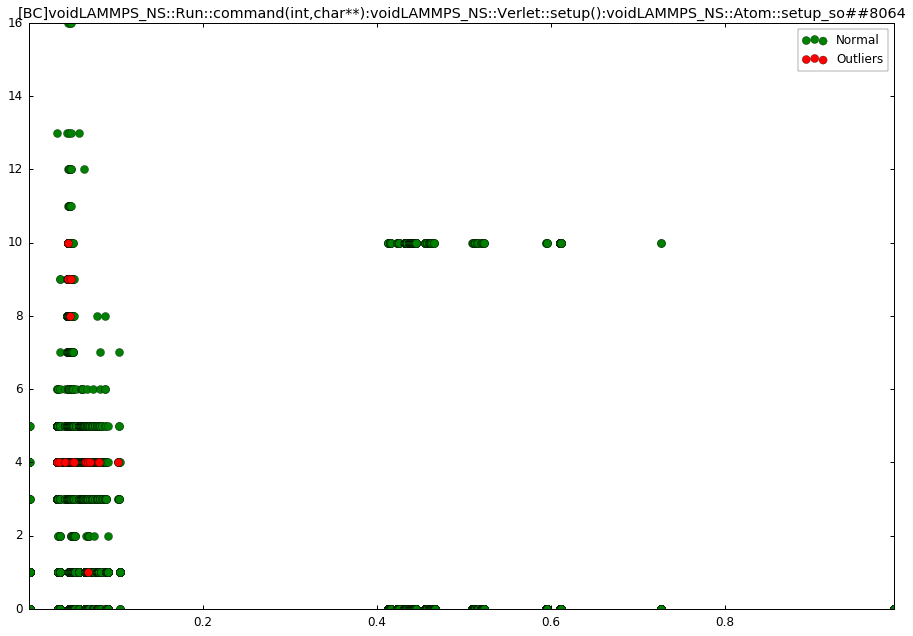

************************************************************
Threshold = 0.9800, #Anomalies=0, Total #Datapoints=8064


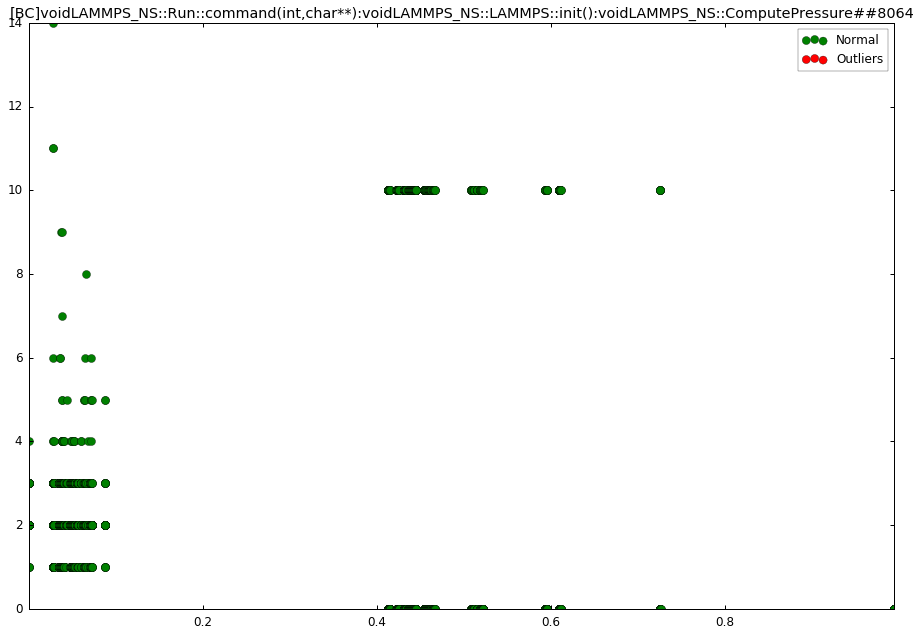

************************************************************
Threshold = 0.9800, #Anomalies=108, Total #Datapoints=8064


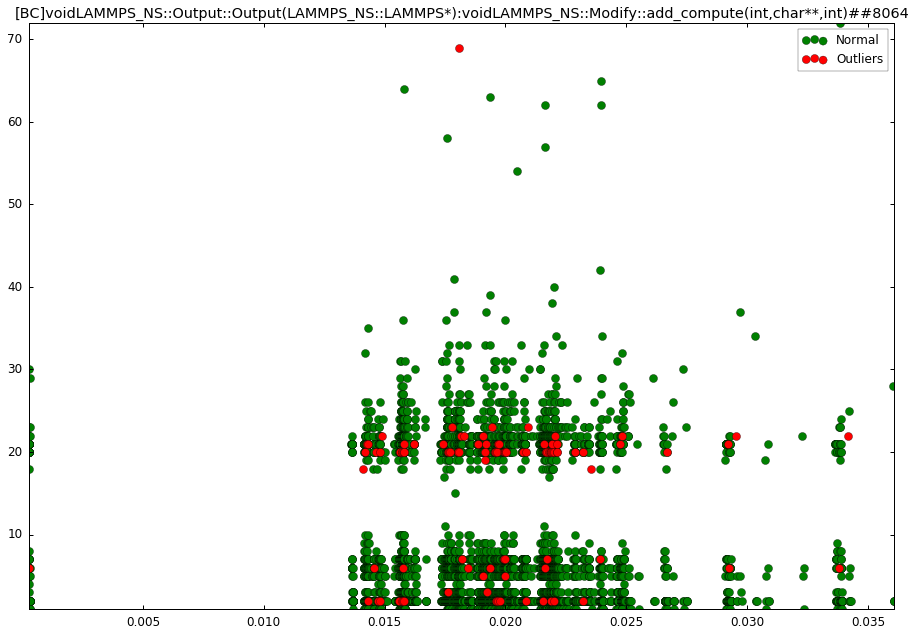

************************************************************
Threshold = 0.9950, #Anomalies=255, Total #Datapoints=6048


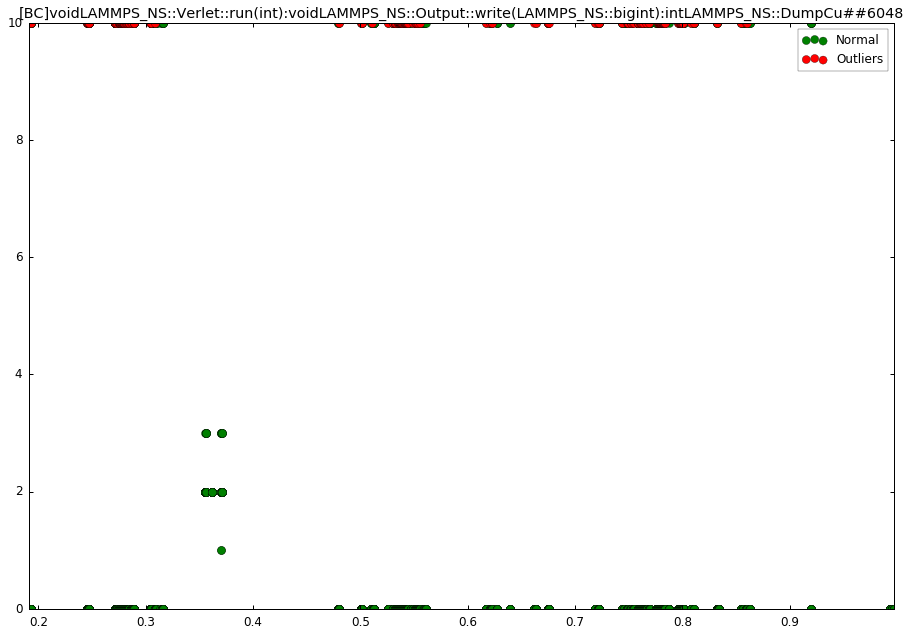

************************************************************
Threshold = 0.9950, #Anomalies=286, Total #Datapoints=6048


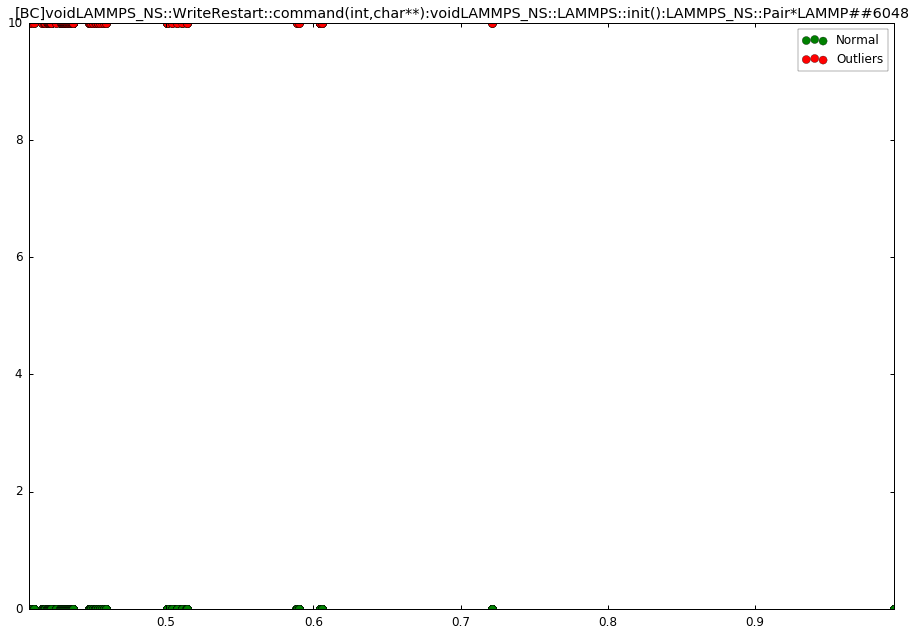

Progress: 50.0%
************************************************************
Threshold = 0.9800, #Anomalies=297, Total #Datapoints=6048


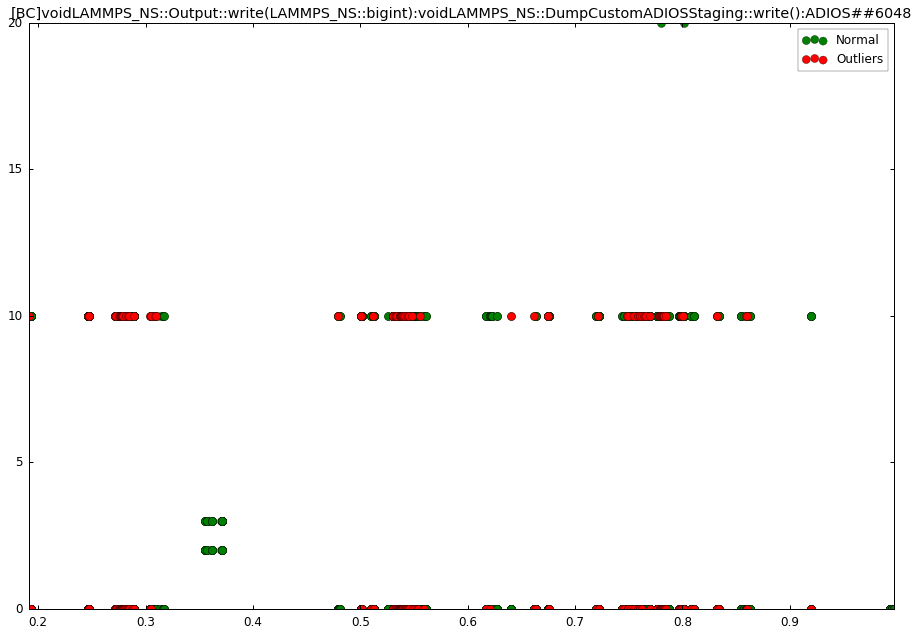

************************************************************
Threshold = 0.9800, #Anomalies=40, Total #Datapoints=6048


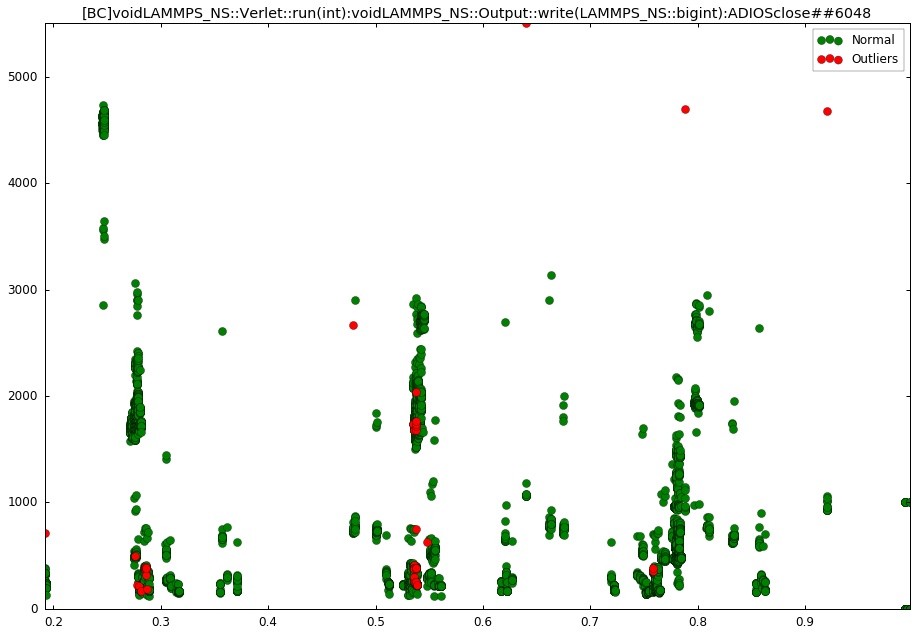

Progress: 55.2631578947%
************************************************************
Threshold = 0.9800, #Anomalies=88, Total #Datapoints=6048


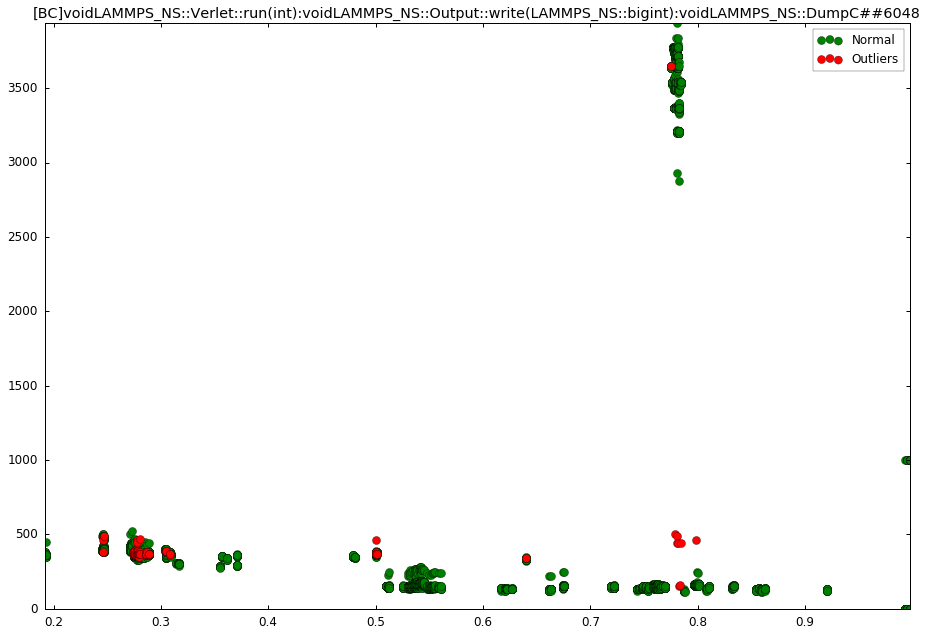

************************************************************
Threshold = 0.9800, #Anomalies=15, Total #Datapoints=6048


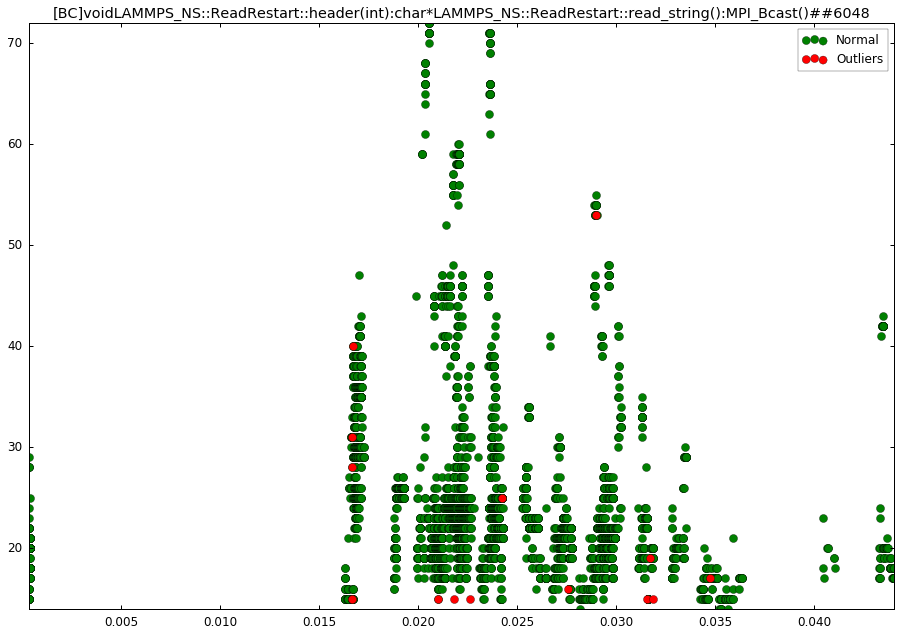

Progress: 60.5263157895%
************************************************************
Threshold = 0.9800, #Anomalies=3, Total #Datapoints=6048


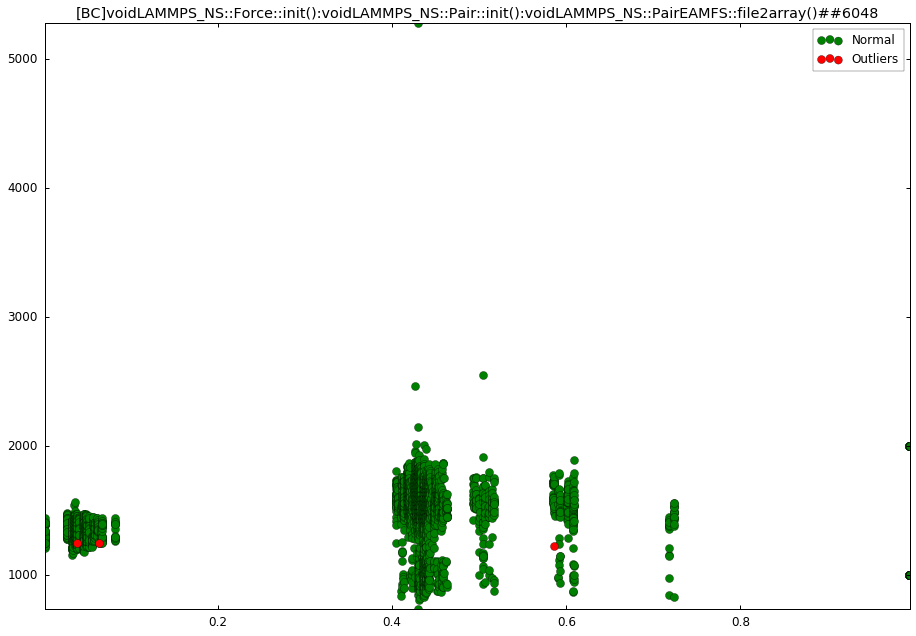

************************************************************
Threshold = 0.9800, #Anomalies=15, Total #Datapoints=6048


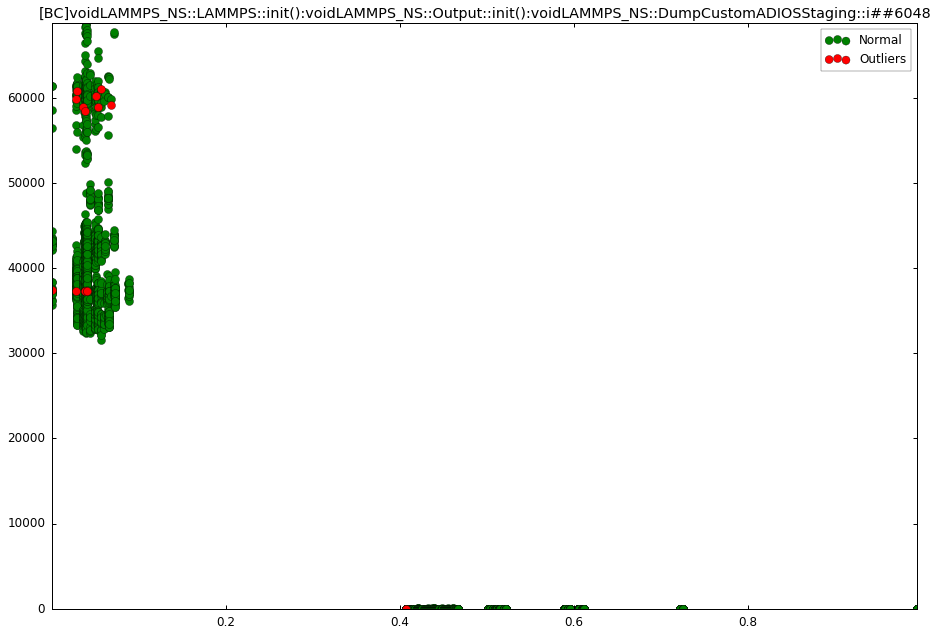

Progress: 65.7894736842%
************************************************************
Threshold = 0.9800, #Anomalies=74, Total #Datapoints=6048


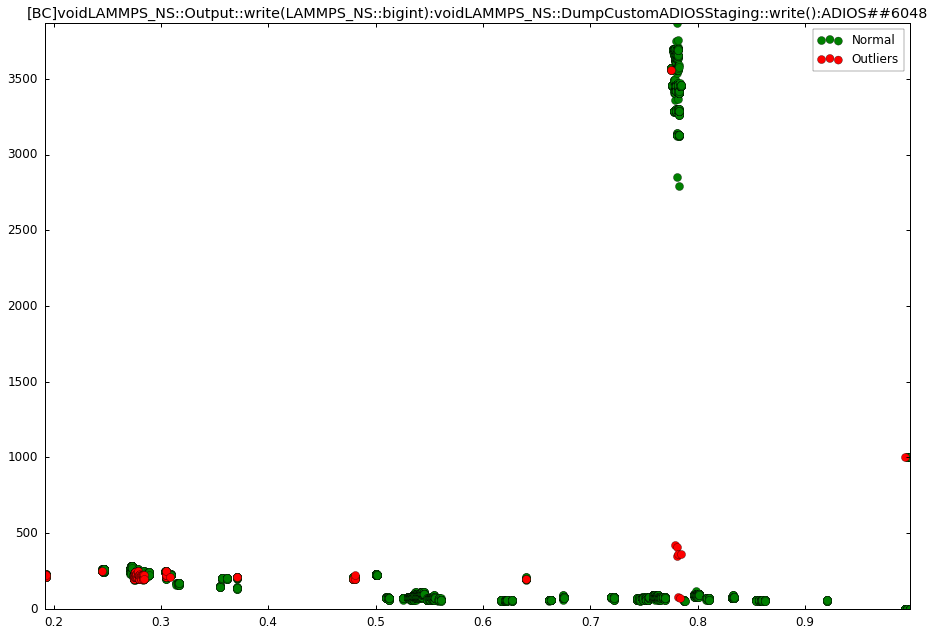

************************************************************
Threshold = 0.9800, #Anomalies=14, Total #Datapoints=6048


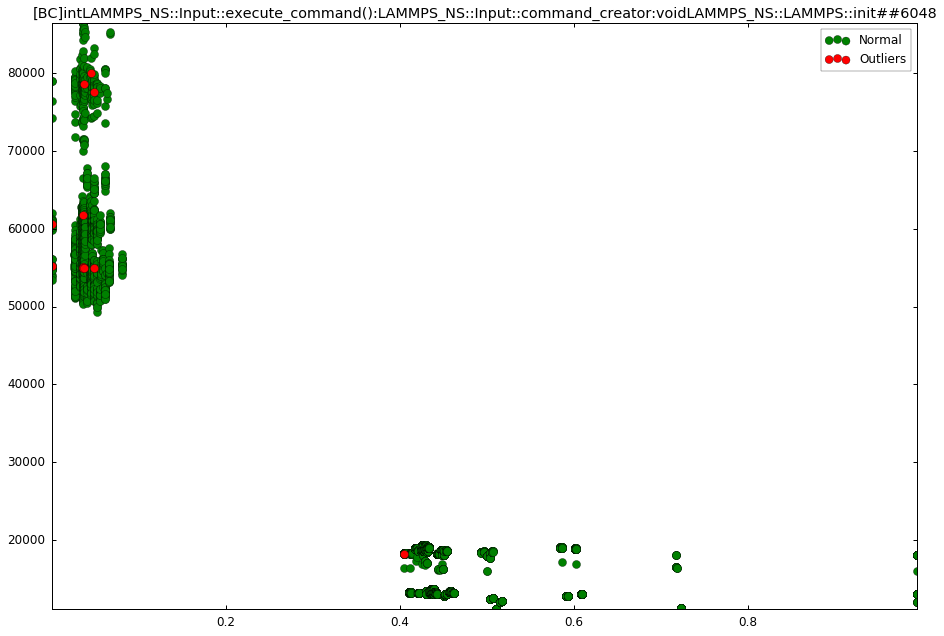

************************************************************
Threshold = 0.9800, #Anomalies=140, Total #Datapoints=6048


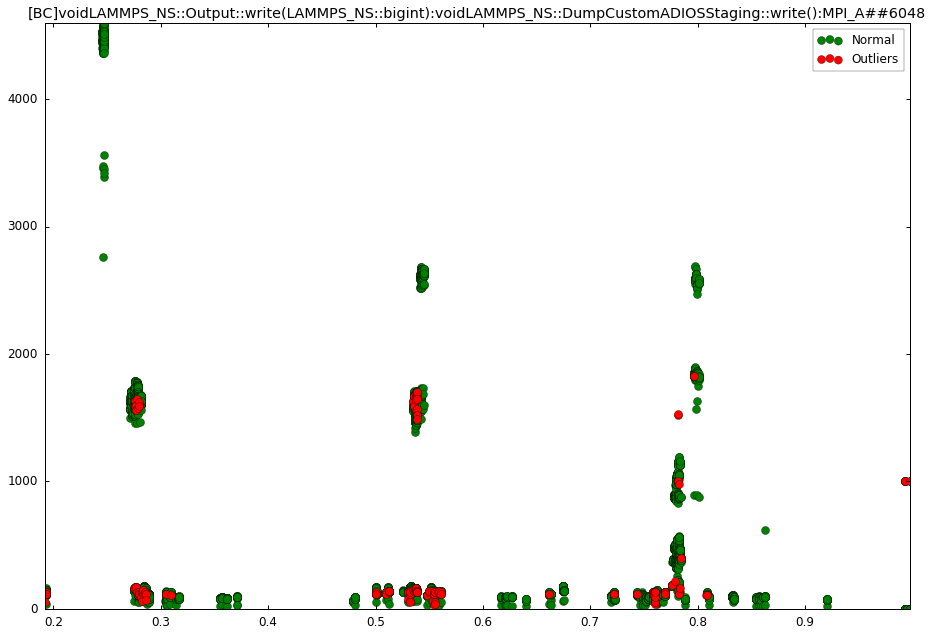

************************************************************
Threshold = 0.9800, #Anomalies=10, Total #Datapoints=6048


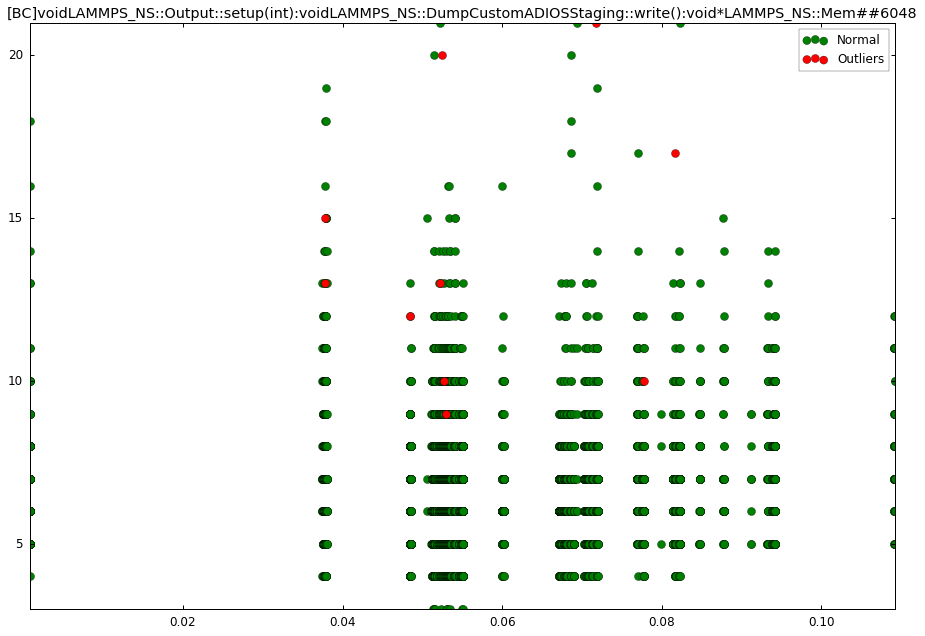

************************************************************
Threshold = 0.9800, #Anomalies=4, Total #Datapoints=6048


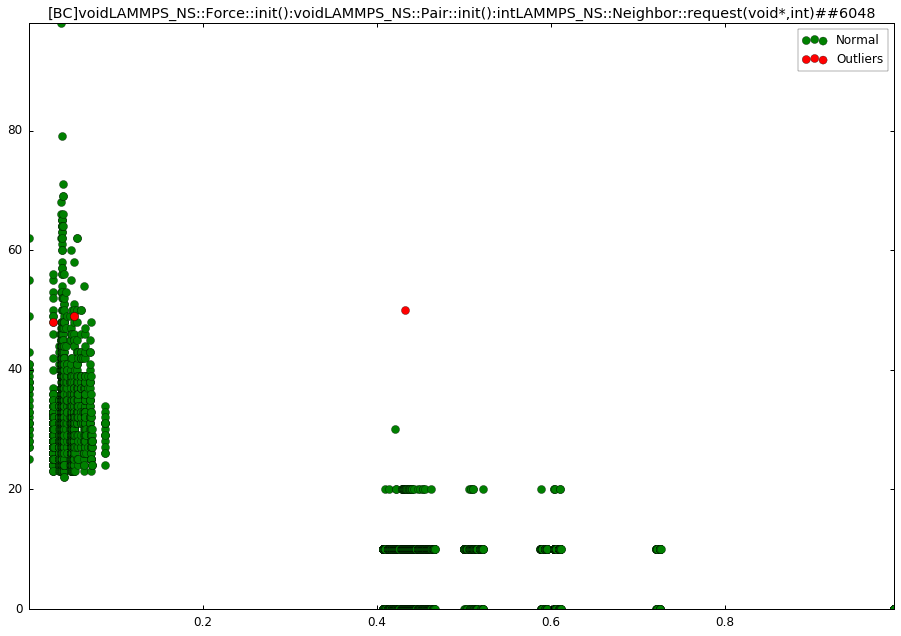

************************************************************
Threshold = 0.9950, #Anomalies=115, Total #Datapoints=6048


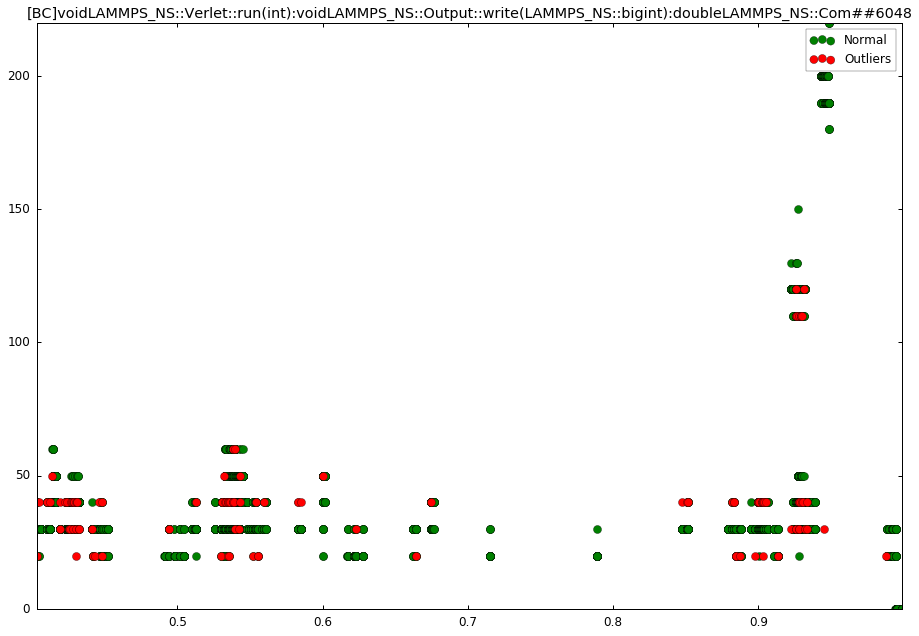

************************************************************
Threshold = 0.9800, #Anomalies=3, Total #Datapoints=6048


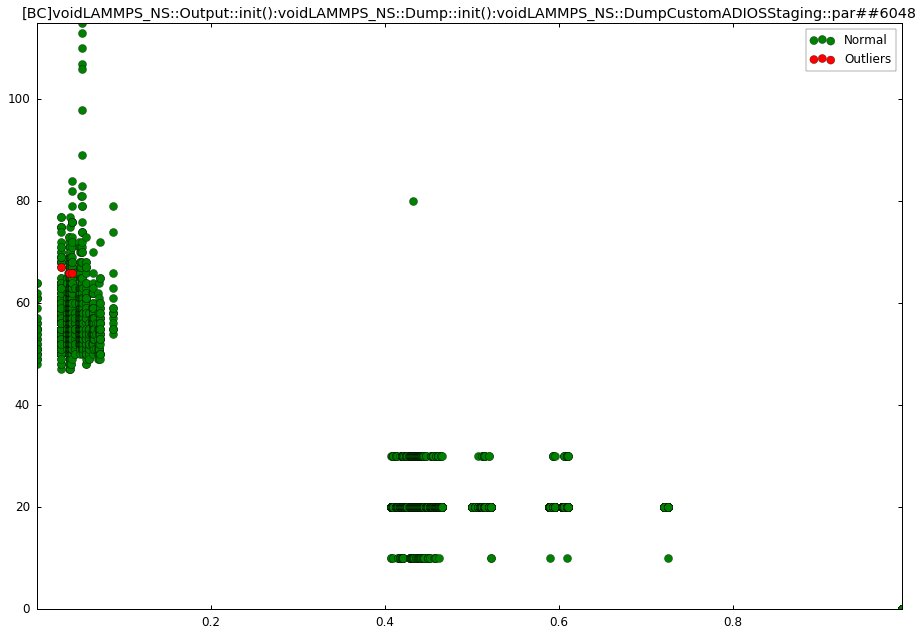

************************************************************
Threshold = 0.9800, #Anomalies=38, Total #Datapoints=6048


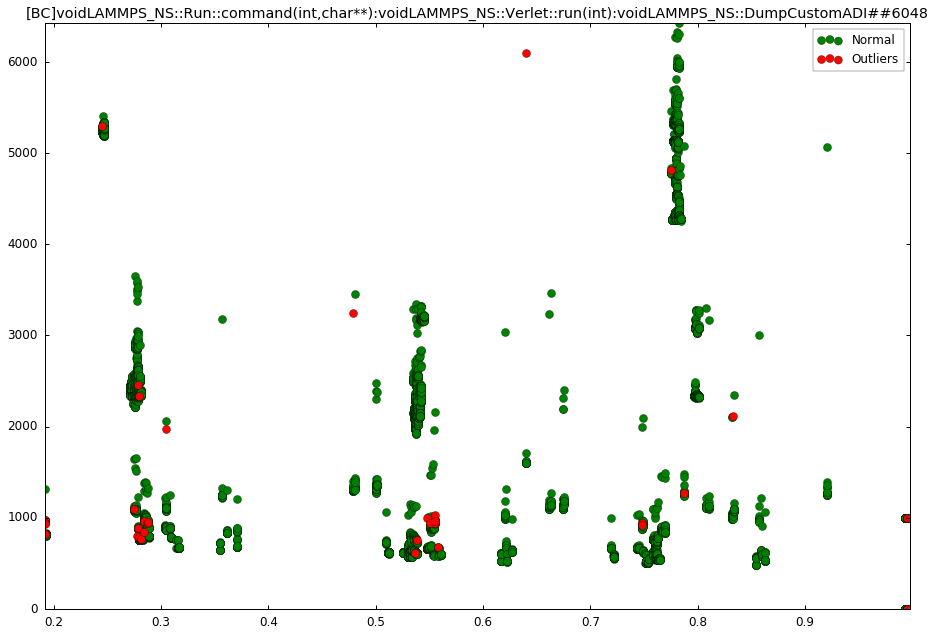

************************************************************
Threshold = 0.9800, #Anomalies=3, Total #Datapoints=6048


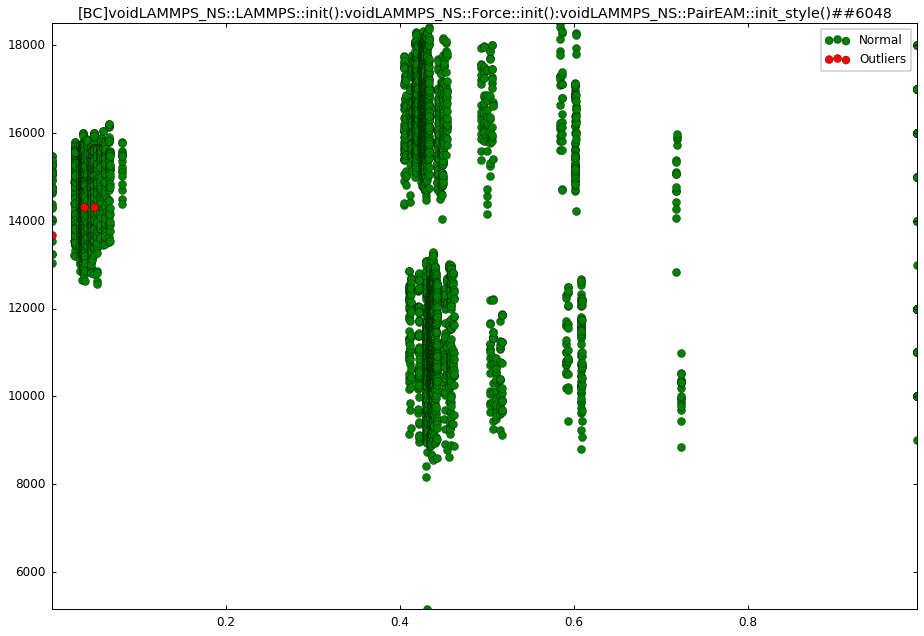

************************************************************
Threshold = 0.9800, #Anomalies=13, Total #Datapoints=6048


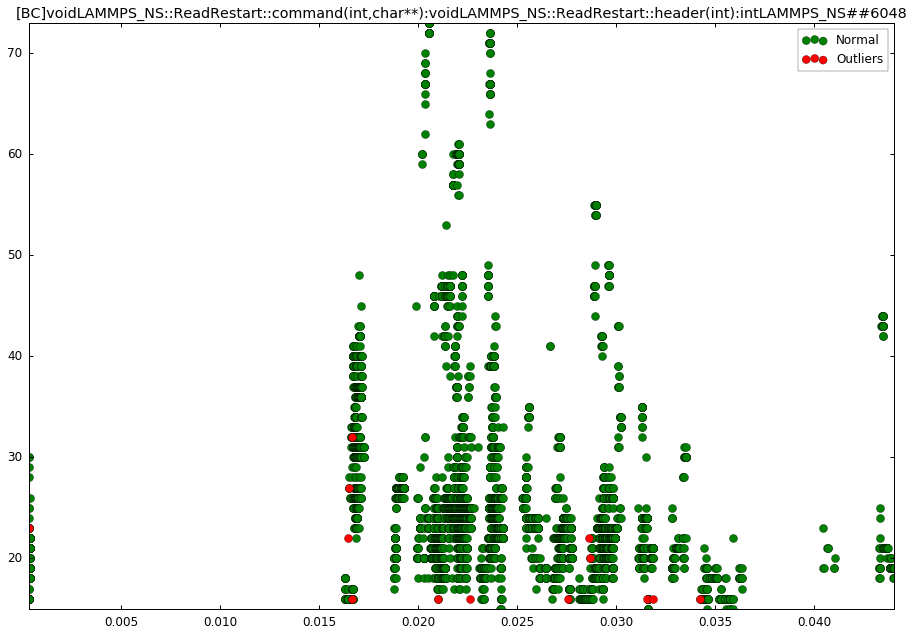

************************************************************
Threshold = 0.9800, #Anomalies=6, Total #Datapoints=6048


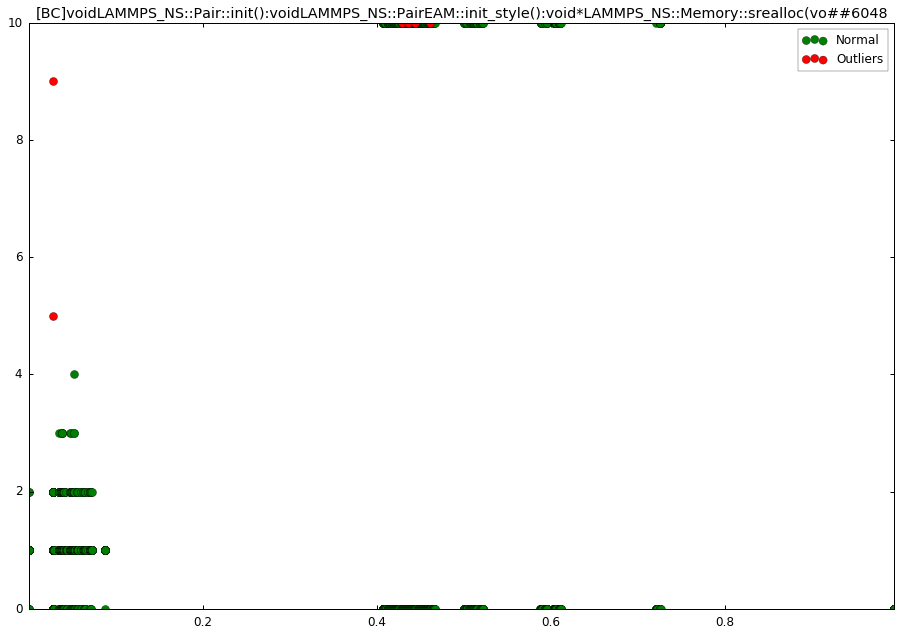

************************************************************
Threshold = 0.9800, #Anomalies=1, Total #Datapoints=6048


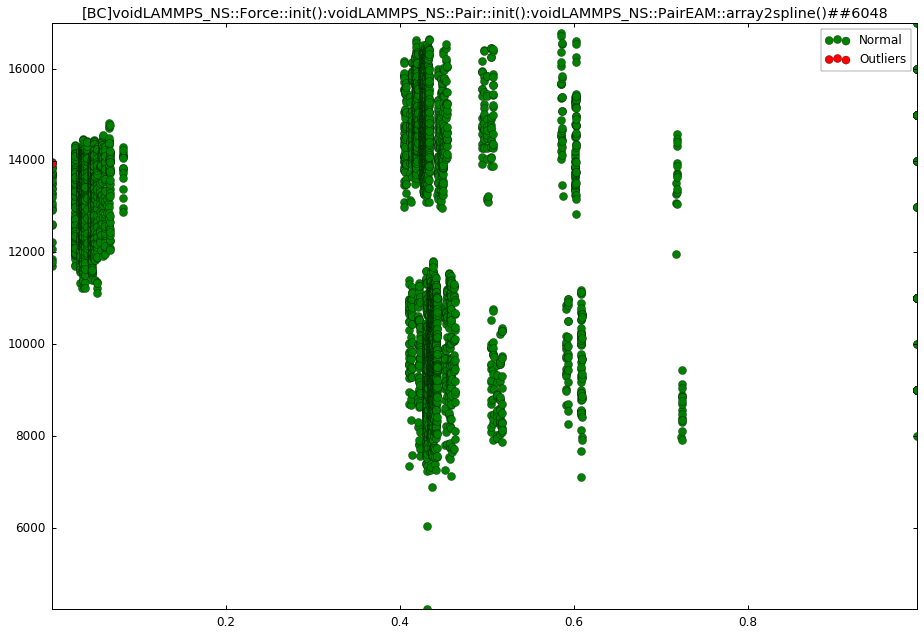

************************************************************
Threshold = 0.9800, #Anomalies=7, Total #Datapoints=5410


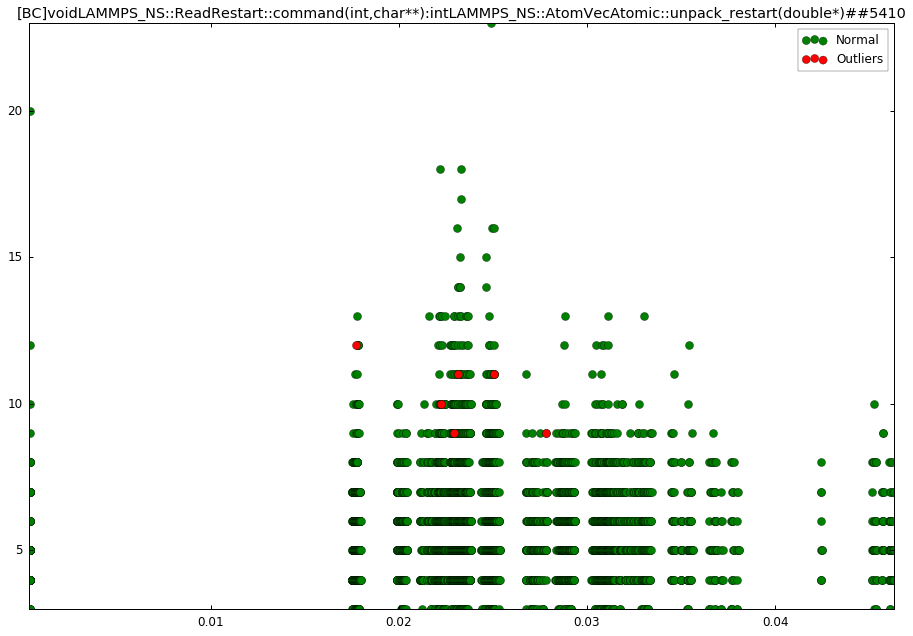

End of search
CPU times: user 7h 24min 43s, sys: 2h 12min 29s, total: 9h 37min 13s
Wall time: 24min 29s


In [24]:
%%time

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

for i in range(len(freq_subset)):
    pick_func = freq_subset[i]['kl']
    
    last = -1
    
    if int(100.0*i/len(freq_subset)) % 5 == 0 and last != int(100.0*i/len(freq_subset)) % 5:
        print('Progress: ' + str(100.0*i/len(freq_subset)) + '%')
        last = int(100.0*i/len(freq_subset)) % 5
    
    count     = freq_subset[i]['numberofcalls']
    lbl       = str(pick_func)[:100] +'##'+ str(count)
    
    frak      = 0.05
    
    while (count * frak > 200):
        frak = frak / 2

    perform_bayesiancp(sf[sf['kl'] == pick_func], thetitle=lbl, frac=frak, erunlen=2, inputlag=0)

print('End of search')

In [ ]:
%%time

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
import time

for i in range(len(freq_subset)):
    #
    start = time.time()
    #
    pick_func = freq_subset[i]['kl']
    last      = -1
    
    if int(100.0*i/len(freq_subset)) % 5 == 0 and last != int(100.0*i/len(freq_subset)) % 5:
        print('Progress: ' + str( int(100.0*i/len(freq_subset)) ) + '%')
        last = int(100.0*i/len(freq_subset)) % 5
    
    count     = freq_subset[i]['numberofcalls']
    lbl       = str(pick_func)[:100] +'##'+ str(count)
    frak      = 0.05
    
    while (count * frak > 200):
        frak = frak / 2

    perform_bayesiancp(sf[sf['kl'] == pick_func], thetitle=lbl, frac=frak, erunlen=2, inputlag=0)
    end = time.time()
    #
    print(i, ' Time for this loop : ', end - start)

print('End of search')

In [ ]:
#################################################################
#################################################################